In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

# Mengecek Dataset

In [2]:
data = pd.read_csv("phones_data.csv")
data.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1224 non-null   int64  
 1   brand_name      1224 non-null   object 
 2   model_name      1224 non-null   object 
 3   os              1027 non-null   object 
 4   popularity      1224 non-null   int64  
 5   best_price      1224 non-null   float64
 6   lowest_price    964 non-null    float64
 7   highest_price   964 non-null    float64
 8   sellers_amount  1224 non-null   int64  
 9   screen_size     1222 non-null   float64
 10  memory_size     1112 non-null   float64
 11  battery_size    1214 non-null   float64
 12  release_date    1224 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 124.4+ KB


# Data Cleaning

In [4]:
data.isna().sum()

Unnamed: 0          0
brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.drop('Unnamed: 0', axis = 1, inplace= True)
data.drop('brand_name', axis = 1, inplace= True)
data.drop('model_name', axis = 1, inplace= True)
data.drop('os', axis = 1, inplace= True)
data.drop('release_date', axis = 1, inplace= True)

In [7]:
data.head()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
0,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0
1,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0
2,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0
3,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0
4,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0


In [8]:
data.isna().sum()

popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
dtype: int64

In [9]:
rata_low = data["lowest_price"].mean()
data["lowest_price"] = data["lowest_price"].fillna(rata_low)
data["lowest_price"].isna().sum()

0

In [10]:
rata_high = data["highest_price"].mean()
data["highest_price"] = data["highest_price"].fillna(rata_high)
data["highest_price"].isna().sum()

0

In [11]:
rata_high = data["screen_size"].mean()
data["screen_size"] = data["screen_size"].fillna(rata_high)
data["screen_size"].isna().sum()

0

In [12]:
rata_high = data["memory_size"].mean()
data["memory_size"] = data["memory_size"].fillna(rata_high)
data["memory_size"].isna().sum()

0

In [13]:
rata_high = data["battery_size"].mean()
data["battery_size"] = data["battery_size"].fillna(rata_high)
data["battery_size"].isna().sum()

0

In [14]:
data.isna().sum()

popularity        0
best_price        0
lowest_price      0
highest_price     0
sellers_amount    0
screen_size       0
memory_size       0
battery_size      0
dtype: int64

# Data Splitting

In [15]:
x = data.drop(['popularity'], axis=1)
y = data['popularity']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [17]:
x.head()

,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
0,1690.0,1529.000000,1819.000000,36,5.00,8.0,2000.0
1,1803.0,1659.000000,2489.000000,36,5.00,16.0,2000.0
2,1803.0,1659.000000,2489.000000,36,5.00,16.0,2000.0
3,1803.0,1659.000000,2489.000000,36,5.00,16.0,2000.0
4,1999.0,7716.018672,9883.410788,10,5.71,16.0,3000.0


In [18]:
y.head()

0     422
1     323
2     299
3     287
4    1047
Name: popularity, dtype: int64

# K-Nearest Neighbour (KNN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier()

In [21]:
#Melatih Dataset
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
#Melihat Keberhasilan Training
knn.score(x_test, y_test)

0.0

In [23]:
y_pred = knn.predict(x_test)
print(y_pred)

[ 659  474  237    9   34   53    8  343   92   26  638  328  211  525
  470   56  129  248  658  165  352  230   93  222  392  133   82   15
  344  730  900  133  141   56  117  228  245  187  380  476  118  248
  269  124   21  344   53  233  802  353  345  977  248  729   80  222
  180   26  238  694  624  106  429   59  143  474  134    4  520  117
  497   36  714   20   42   61  238  595  694  230   40   49  226  755
  129  169  106  341  232   91  625  735  392  744   59  765  136   62
  328  314  476  269   26   16   40  188   91   21  233   17  133  304
  269  233  328  476    8  118  834   25  510   54    9  260  802  918
  470   73  233  429  150  595  298    3  344   82  232  474  552   74
   21  118   55  222  248  394  359  211  341  247  276   40   66  359
  659   12   36  752  160  139  106  661  137  611  573  137 1056  704
  320  444   21   41  269  185  160   34  510    4  661  247  136   18
   34  230  242   26  304  123  714   13  476   20  205  277   92  277
  476 

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       0.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       0.0
          19       0.00    

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [25]:
y_test.shape

(368,)

In [26]:
confusion_matrix(y_test, y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2)

In [28]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [29]:
dt_pred = dt.predict(x_test)

In [30]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          32       0.00      0.00      0.00       1.0
          43       0.00      0.00      0.00       1.0
          44       0.00      0.00      0.00       1.0
          45       0.00      0.00      0.00       1.0
          47       0.00      0.00      0.00       1.0
          52       0.00      0.00      0.00       1.0
          57       0.00    

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

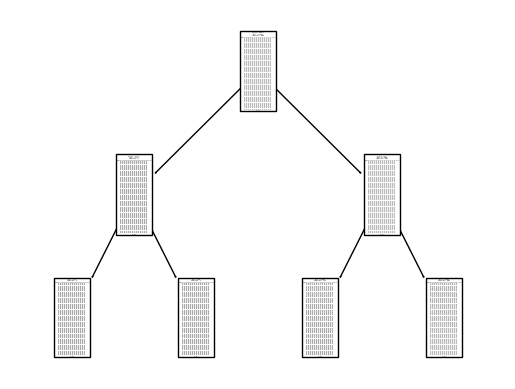

In [31]:
from sklearn import tree
tree.plot_tree(dt)
plt.show()

# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

gnb = GaussianNB()
mnb = MultinomialNB()

In [33]:
gnb.fit(x_train, y_train)

GaussianNB()

In [34]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [35]:
gnb_pred = gnb.predict(x_test)
mnb_pred = mnb.predict(x_test)

In [36]:
print("Gaussian NB :")
print(classification_report(y_test, gnb_pred))

Gaussian NB :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       0.0
          22       0.00      0.00      0.00       0.0
          23       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       0.0
          26       0.00      0.00      0.00       0.0
          29 

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [37]:
print("Multinomial NB :")
print(classification_report(y_test, mnb_pred))

Multinomial NB :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          21       0.00      0.00      0.00       0.0
          23       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       0.0
          26       0.00      0.00      0.00       0.0
          27       0.00      0.00      0.00       0.0
          

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

# Support Vector Machine

In [38]:
from sklearn.svm import SVC
svm = SVC()

In [39]:
svm.fit(x_train, y_train)

SVC()

In [40]:
svm_pred = svm.predict(x_test)

In [41]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
           9       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          14       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       0.0
          23       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       0.0
          28       0.00      0.00      0.00       0.0
          29       0.00      0.00      0.00       0.0
          30       0.00      0.00      0.00       0.0
          31       0.00    

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

# Linear Regression

In [42]:
data.isna().sum()

popularity        0
best_price        0
lowest_price      0
highest_price     0
sellers_amount    0
screen_size       0
memory_size       0
battery_size      0
dtype: int64

In [43]:
data.duplicated().sum()

0

In [44]:
#Import Library Linear Regression

from sklearn.linear_model import LinearRegression
lg = LinearRegression()

# 1. Simple Regression

In [45]:
lg.fit(data[['memory_size']], data.popularity)

LinearRegression()

In [46]:
data.head()

,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
0,422,1690.0,1529.000000,1819.000000,36,5.00,8.0,2000.0
1,323,1803.0,1659.000000,2489.000000,36,5.00,16.0,2000.0
2,299,1803.0,1659.000000,2489.000000,36,5.00,16.0,2000.0
3,287,1803.0,1659.000000,2489.000000,36,5.00,16.0,2000.0
4,1047,1999.0,7716.018672,9883.410788,10,5.71,16.0,3000.0


In [47]:
print(lg.predict([[8.0]]))

[556.97271938]


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


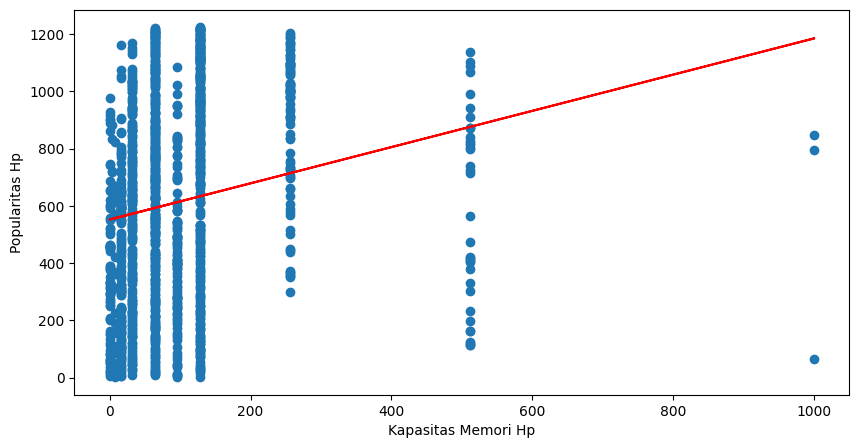

In [48]:
plt.figure(figsize=(10,5))
plt.xlabel('Kapasitas Memori Hp')
plt.ylabel('Popularitas Hp')
plt.scatter(data[['memory_size']], data.popularity)
plt.plot(data[['memory_size']], lg.predict(data[['memory_size']]), color='Red')

# 2. Multiple Regression

In [49]:
lg.fit(data[['memory_size','battery_size']], data.popularity)

LinearRegression()

In [50]:
print(lg.predict([[8.0, 2000.0]]))

[498.89414576]


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [51]:
lg.coef_

array([0.54521163, 0.04090952])

In [52]:
lg.intercept_

412.713414823025